In [1]:
# import the libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix


# !pip install shap

import shap

In [2]:
#reading the file
data = pd.read_csv('../Data/f_churn.csv')
data.head()

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [3]:
data=data.drop(['Unnamed: 0'],axis=1)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1


In [4]:
# creating the features and target
X = data.drop(['Exited'] , axis = 1)
y = data['Exited']

In [5]:
X.shape , y.shape

((10000, 12), (10000,))

In [6]:
# make train and test 
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , train_size=0.8)

In [7]:
# model
rf = RandomForestClassifier()
rf.fit(X_train , y_train)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(X_test)

In [9]:
#  Evaluating Performance

accuracy = accuracy_score(y_test , y_pred)
accuracy

0.866

In [10]:
confusion_matrix(y_test , y_pred)

array([[1542,   65],
       [ 203,  190]], dtype=int64)

### shapley value

<img src='imgs/shap.png' width='65%' />

In [11]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf)

In [12]:
# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

In [13]:
print('Expected Value:', explainer.expected_value)

Expected Value: [0.79433875 0.20566125]


In [17]:
# Shap Values for class 0 that is  class
print("Shap Values for '0' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for '0' class


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender
0,0.013291,0.080988,0.019225,0.012759,-0.024380,0.000711,-0.033003,0.007456,-0.008601,0.070183,0.027965,0.029065
1,-0.015714,-0.148892,-0.011086,-0.067734,-0.461931,-0.007197,0.030529,-0.004587,-0.010309,-0.074415,-0.007244,0.014242
2,-0.043381,-0.003686,-0.036065,-0.089458,-0.081044,-0.016197,0.017901,-0.026445,-0.029513,-0.175357,-0.016691,-0.084404
3,0.025985,-0.166481,-0.003737,0.048651,0.158252,0.010040,0.086600,-0.004321,0.013252,0.020420,0.001886,-0.024884
4,0.003667,0.055812,0.000938,0.021712,0.063784,0.001872,0.027535,0.002671,-0.003582,0.011823,0.002592,0.016835


In [18]:
# Shap Values for class 1 that is  class
print("Shap Values for '1' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for '1' class


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender
0,-0.013291,-0.080988,-0.019225,-0.012759,0.024380,-0.000711,0.033003,-0.007456,0.008601,-0.070183,-0.027965,-0.029065
1,0.015714,0.148892,0.011086,0.067734,0.461931,0.007197,-0.030529,0.004587,0.010309,0.074415,0.007244,-0.014242
2,0.043381,0.003686,0.036065,0.089458,0.081044,0.016197,-0.017901,0.026445,0.029513,0.175357,0.016691,0.084404
3,-0.025985,0.166481,0.003737,-0.048651,-0.158252,-0.010040,-0.086600,0.004321,-0.013252,-0.020420,-0.001886,0.024884
4,-0.003667,-0.055812,-0.000938,-0.021712,-0.063784,-0.001872,-0.027535,-0.002671,0.003582,-0.011823,-0.002592,-0.016835


#### SHAP Force Plot : 
These help us visualise each feature and how they force or drive the predictions and in which direction for each class. By default 'RED' drives up probability to higher and blue drives down the prob from base value.

- Force Plot can be for a single instance or data (local interpretations)
- Force plot for all data points

#### FORCE plot for Single Data Point
Here we draw force plot for class 0 for first observation as 0th iloc. We see can below see that first observation has class 0 only so let's us understand how the prob of first observation is affected from all the features and what is the final prob model predict for belonging to class 0.

In [19]:
X_train.iloc[0]

CreditScore             613.00
Age                      39.00
Tenure                    8.00
Balance              118201.41
NumOfProducts             1.00
HasCrCard                 1.00
IsActiveMember            0.00
EstimatedSalary       23315.59
Geography_France          0.00
Geography_Germany         0.00
Geography_Spain           1.00
Gender                    0.00
Name: 6963, dtype: float64

In [21]:
y_train.iloc[0]

0

In [22]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [25]:
#Force Plot for a single observation for a single class 1
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

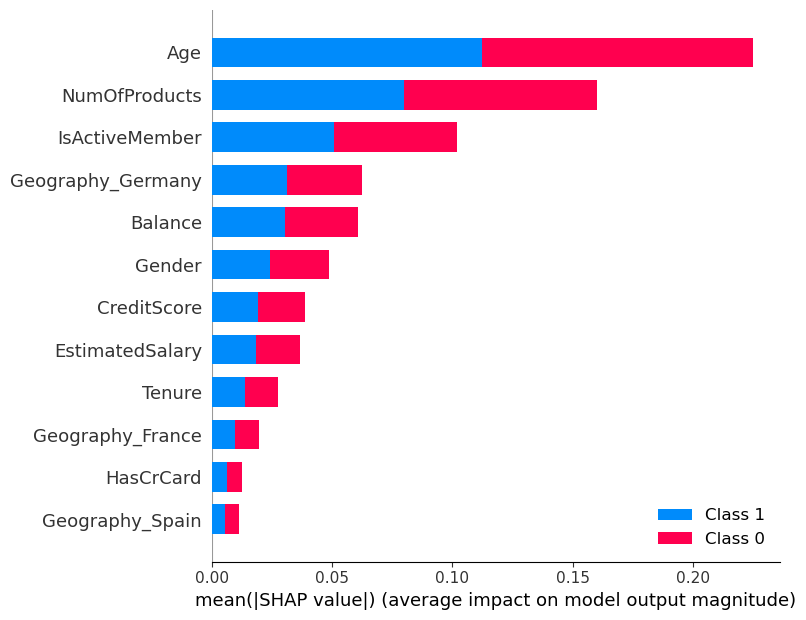

In [30]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

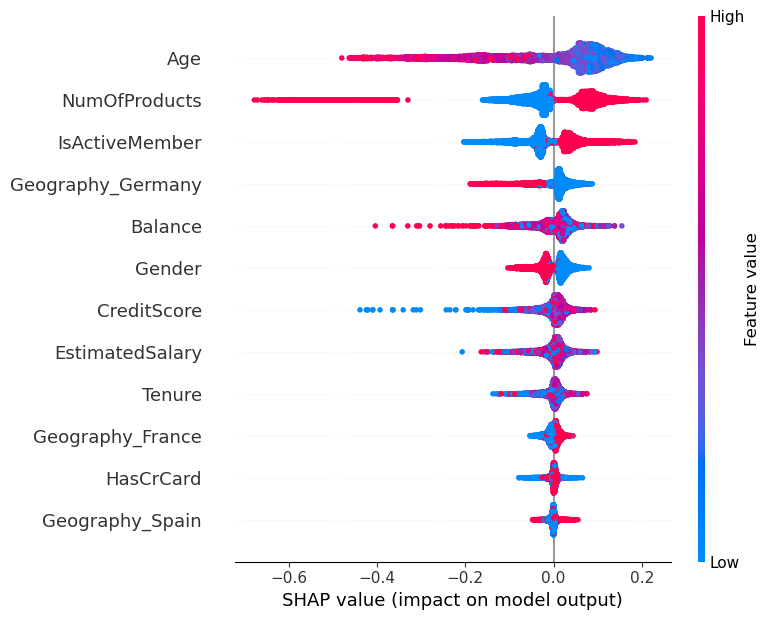

In [31]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

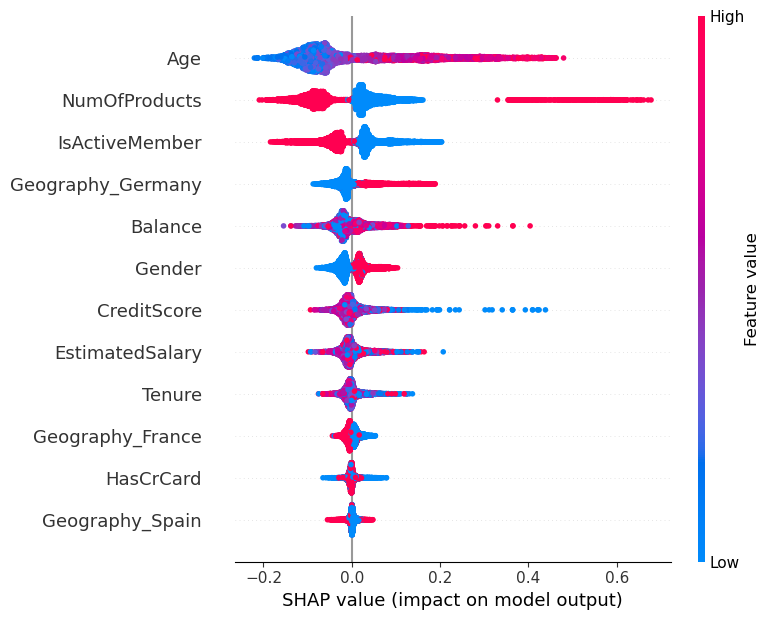

In [32]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

### SHAP Values for Test Set

In [36]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf)

# finding out the shap values using the explainer
shap_values_test = explainer.shap_values(X_test)

#### SHAP Decision Plot
SHAP decision plots show how complex models arrive at their predictions (i.e., how models make decisions). A decision plot can reveal how predictions change across a set of feature values. This method is useful for presenting hypothetical scenarios and exposing model behaviors .

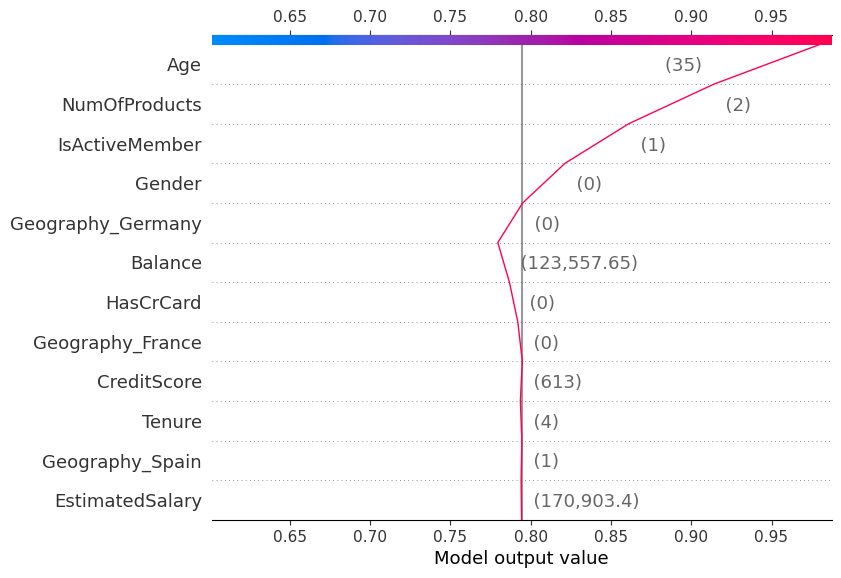

In [37]:
shap.initjs()
shap.decision_plot(explainer.expected_value[0], 
                shap_values_test[0][0,:], X_test.iloc[0,:])